In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
%matplotlib inline

In [2]:
df =pd.read_csv("D:\\lh_data\\ineuron\\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.duplicated(keep=False)  # By setting keep on False, all duplicates are True.

0        True
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [4]:
df[df.duplicated(keep=False) ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [9]:
df.shape

(1599, 12)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1359, 12)

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']    #dropping quality

In [14]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler   # works better with outliers
#scaler = StandardScaler()
scaler = RobustScaler()
df_sc = scaler.fit_transform(df.drop(labels=["quality"],axis=1))  # outputs an array without columns info
df_sc = pd.DataFrame(df_sc, columns=columns)
df_sc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.238095,0.72,-0.764706,-0.428571,-0.142857,-0.214286,-0.097561,0.495495,1.052632,-0.333333,-0.5000
1,-0.047619,1.44,-0.764706,0.571429,0.904762,0.785714,0.707317,0.045045,-0.578947,0.333333,-0.2500
2,-0.047619,0.96,-0.647059,0.142857,0.619048,0.071429,0.390244,0.135135,-0.263158,0.166667,-0.2500
3,1.571429,-0.96,0.882353,-0.428571,-0.190476,0.214286,0.536585,0.585586,-0.789474,-0.222222,-0.2500
4,-0.238095,0.56,-0.764706,-0.571429,-0.190476,-0.071429,0.048780,0.495495,1.052632,-0.333333,-0.5000
...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.523810,0.40,-0.529412,-0.428571,-0.523810,1.000000,0.000000,-0.085586,0.578947,1.111111,-0.4375
1355,-0.809524,0.32,-0.529412,-0.285714,0.523810,1.285714,0.146341,-0.810811,0.736842,-0.222222,0.1875
1356,-0.952381,0.12,-0.470588,0.000000,-0.809524,1.785714,0.317073,-0.711712,1.105263,0.777778,0.6250
1357,-0.952381,0.50,-0.411765,-0.285714,-0.190476,1.285714,0.146341,-0.554054,1.368421,0.500000,0.0000


In [15]:
X=df_sc.values
print(X.shape)
X

(1359, 11)


array([[-0.23809524,  0.72      , -0.76470588, ...,  1.05263158,
        -0.33333333, -0.5       ],
       [-0.04761905,  1.44      , -0.76470588, ..., -0.57894737,
         0.33333333, -0.25      ],
       [-0.04761905,  0.96      , -0.64705882, ..., -0.26315789,
         0.16666667, -0.25      ],
       ...,
       [-0.95238095,  0.12      , -0.47058824, ...,  1.10526316,
         0.77777778,  0.625     ],
       [-0.95238095,  0.5       , -0.41176471, ...,  1.36842105,
         0.5       ,  0.        ],
       [-0.9047619 , -0.84      ,  0.61764706, ...,  0.42105263,
         0.22222222,  0.5       ]])

In [16]:
y=df["quality"]
print(y.shape)
y

(1359,)


0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.33,random_state=42)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(910, 11) (449, 11) (910,) (449,)


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier


In [19]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_x,train_y)

DecisionTreeClassifier(random_state=0)

In [20]:
predict_y = clf.predict(test_x)
predict_y

array([4, 6, 6, 7, 4, 7, 4, 5, 6, 6, 6, 7, 5, 5, 4, 5, 5, 5, 5, 7, 5, 8,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 7, 6, 4, 5, 6, 5, 6, 5, 7, 4, 5, 6, 5,
       6, 5, 5, 5, 4, 6, 6, 7, 5, 5, 6, 5, 6, 3, 6, 5, 5, 7, 5, 5, 6, 6,
       5, 6, 5, 7, 5, 8, 5, 7, 7, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 5,
       6, 6, 6, 5, 5, 6, 6, 6, 4, 7, 6, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 7,
       7, 6, 5, 5, 5, 6, 4, 5, 5, 6, 4, 6, 6, 6, 5, 5, 4, 6, 5, 5, 5, 5,
       6, 5, 5, 3, 7, 6, 6, 6, 4, 5, 7, 6, 7, 6, 6, 5, 6, 6, 4, 6, 5, 5,
       6, 6, 4, 5, 7, 7, 8, 5, 5, 7, 6, 7, 6, 5, 6, 6, 6, 6, 7, 6, 7, 6,
       5, 6, 5, 7, 5, 5, 4, 5, 5, 6, 3, 5, 4, 6, 3, 5, 6, 5, 6, 4, 6, 6,
       7, 6, 5, 5, 5, 7, 5, 7, 6, 6, 6, 6, 7, 6, 5, 5, 7, 5, 6, 7, 5, 6,
       6, 7, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 7, 6, 5, 6, 5, 5, 5,
       6, 6, 7, 4, 5, 7, 5, 6, 6, 6, 7, 6, 6, 8, 5, 5, 6, 6, 7, 5, 5, 5,
       6, 6, 5, 7, 6, 6, 6, 5, 7, 5, 5, 5, 6, 6, 4, 4, 5, 4, 7, 7, 6, 6,
       5, 5, 7, 7, 5, 6, 4, 6, 6, 5, 5, 7, 4, 5, 4,

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(test_y,predict_y)

0.46547884187082406

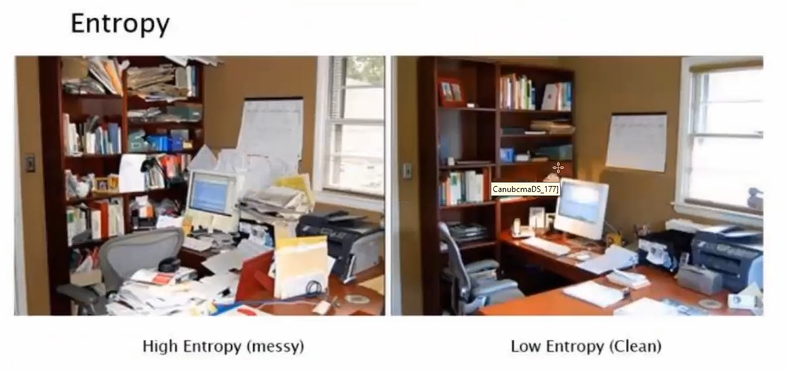

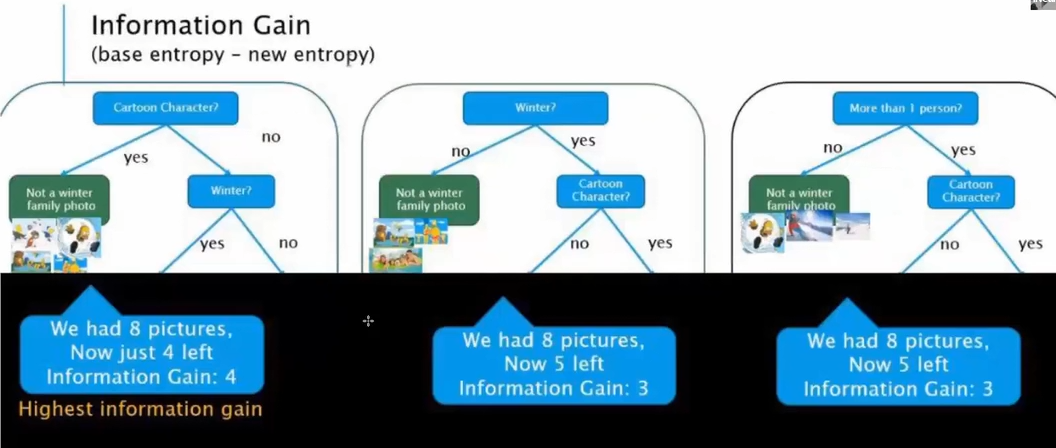

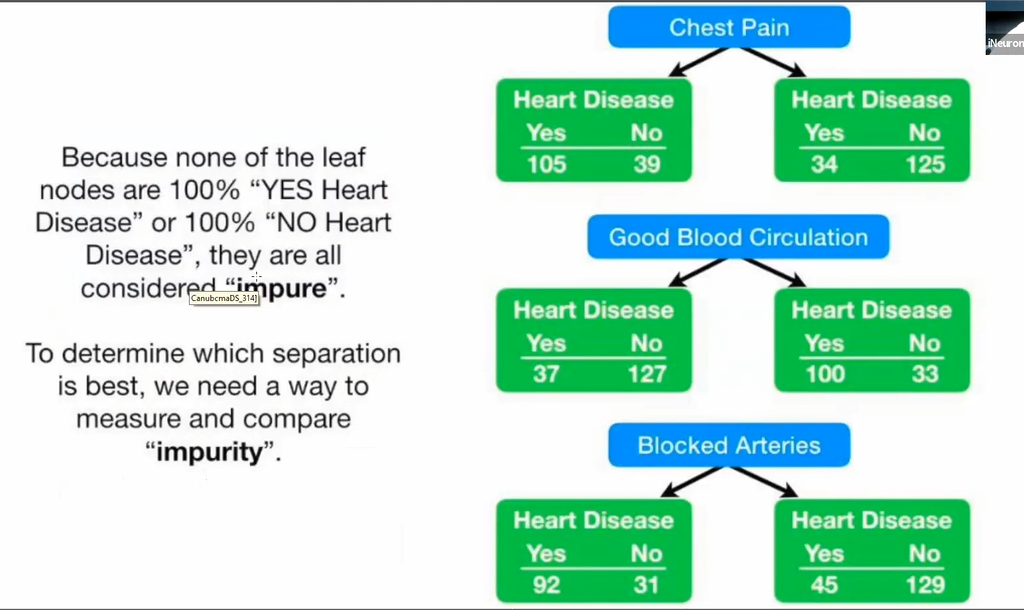

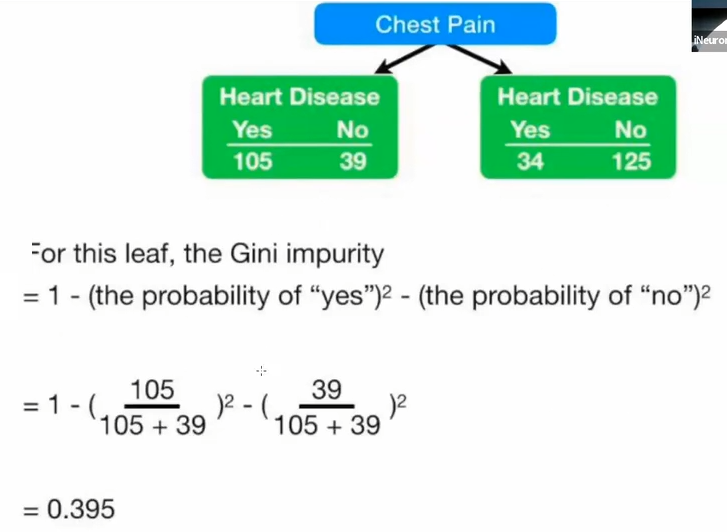

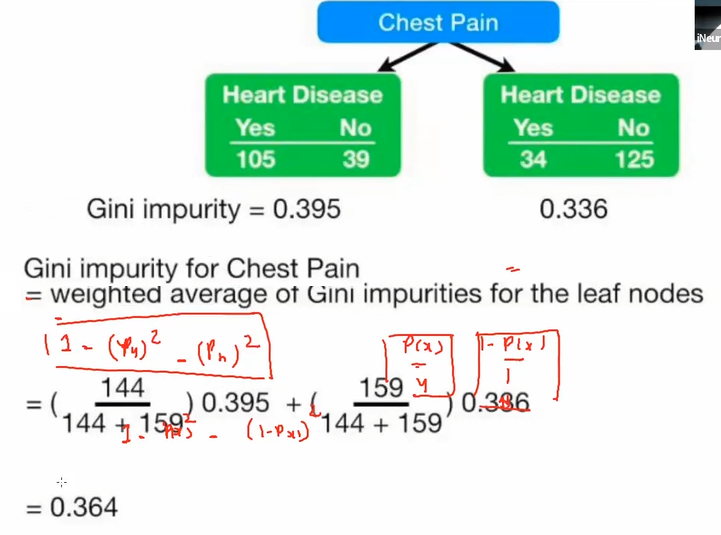

* Since we look for better (less) impurity then the SMALLEST VALUE is the better (blood circulation)

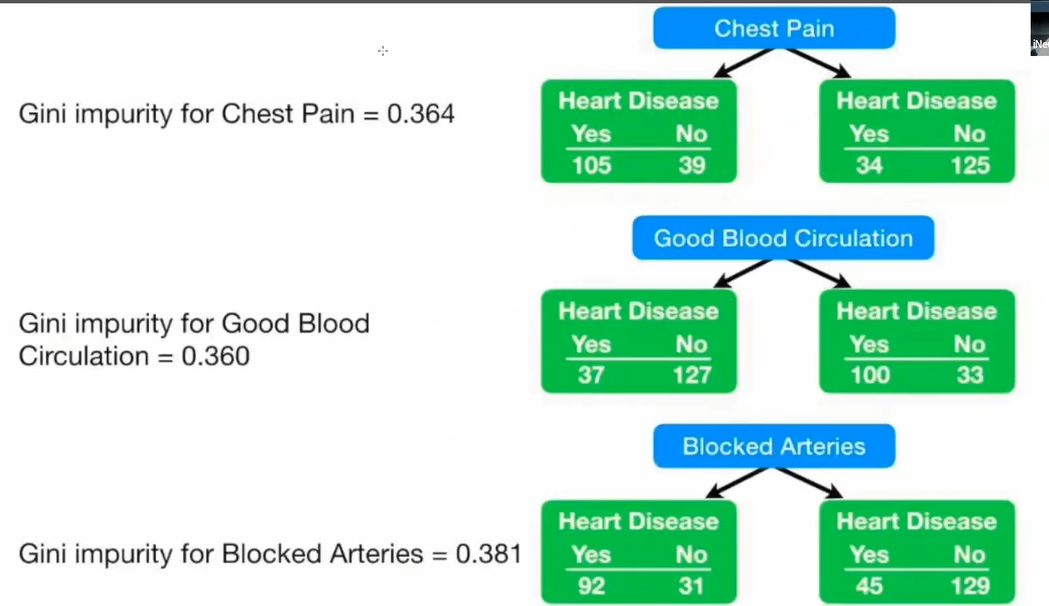